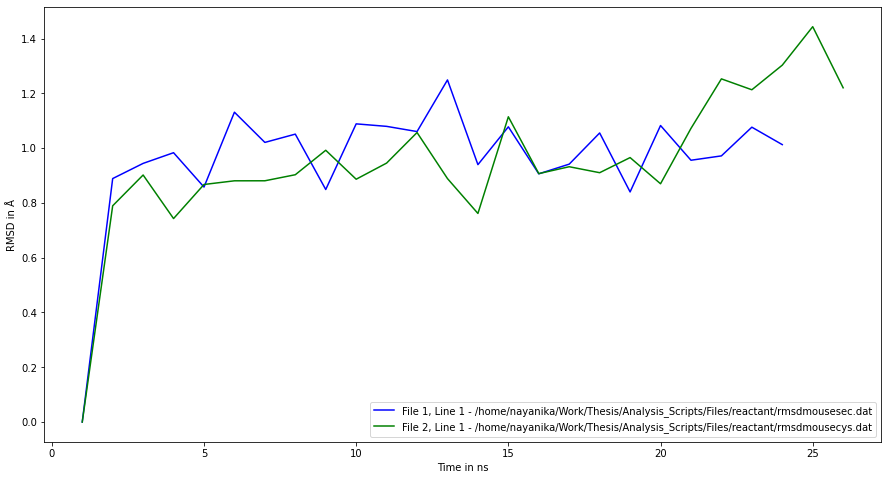

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import matplotlib.patches as patches

# Specify the pattern for .dat files
file_pattern = '/home/nayanika/Work/Thesis/Analysis_Scripts/Files/reactant/rmsdmouse*.dat'

# Get a list of all .dat files that match the pattern
file_list = glob.glob(file_pattern)

# Set the figure size
fig, ax = plt.subplots(figsize=(15, 8))

# Define a list of RGB tuples for colors
#colors = ['red','blue', 'green','purple']
colors = ['blue', 'green']

# Plot each file with a different color
for file_index, (file_path, color) in enumerate(zip(file_list, colors), start=1):
    # Load data from the file using numpy
    data = np.loadtxt(file_path)

    # Assuming the first column is x-axis data
    x_values = data[:, 0]

    # Assuming the remaining columns are y-axis data for different lines
    y_values_list = data[:, 1:]

    # Plot each line with a different color
    for line_index, y_values in enumerate(y_values_list.T, start=1):
        ax.plot(x_values, y_values, label=f'File {file_index}, Line {line_index} - {file_path}', color=color)

# Add labels
ax.set_xlabel('Time in ns')
ax.set_ylabel('RMSD in Å')

# Add legend with custom location
ax.legend(loc='lower right')

plt.show()

#make the python stript as follows - md steps vs rmsd and frames vs rmsd 

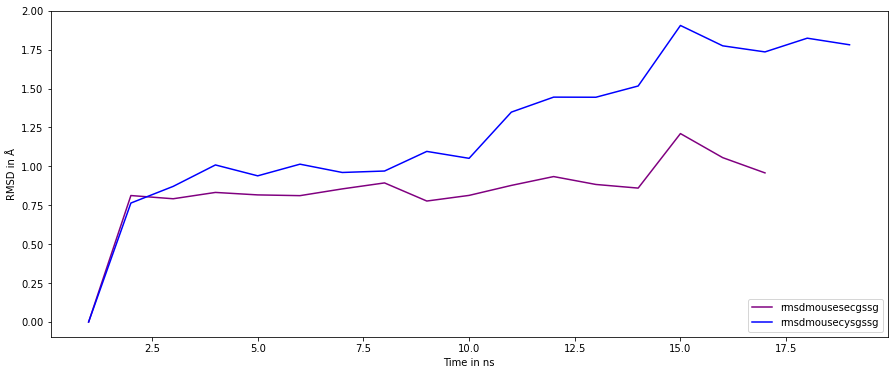

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
import glob

def read_rmsd_file(file_path):
    with open(file_path, 'r') as file:
        data = file.read()

    # Load data into a DataFrame
    df = pd.read_csv(StringIO(data), delim_whitespace=True)
    return df

# Set the figure size
fig, ax = plt.subplots(figsize=(15, 6))

# Use glob to get a list of files matching the pattern
file_pattern = '/home/nayanika/Work/Thesis/Analysis_Scripts/Files/GSSG/rmsdhuman*.dat'
file_paths = glob.glob(file_pattern)

# Define a list of RGB tuples for colors
colors = ['purple','blue']

for file_path, color in zip(file_paths, colors):
    # Extract file name from the path
    file_name = file_path.split('/')[-1].split('.')[0]
    
    # Read data and plot
    df = read_rmsd_file(file_path)
    ax.plot(df['#Frame'], df['RMSD_00002'], label=f'{file_name}', linestyle='-', color=color)

# Add labels
ax.set_xlabel('Time in ns')
ax.set_ylabel('RMSD in Å')

# Add legend with custom location
ax.legend(loc='lower right')

plt.show()

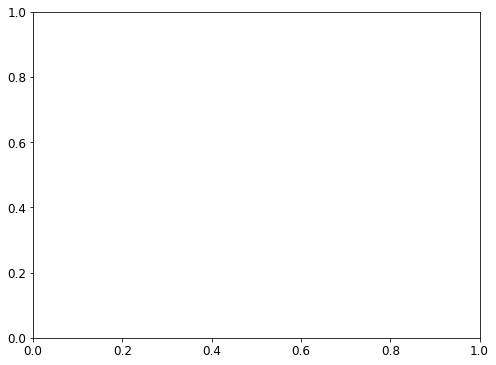

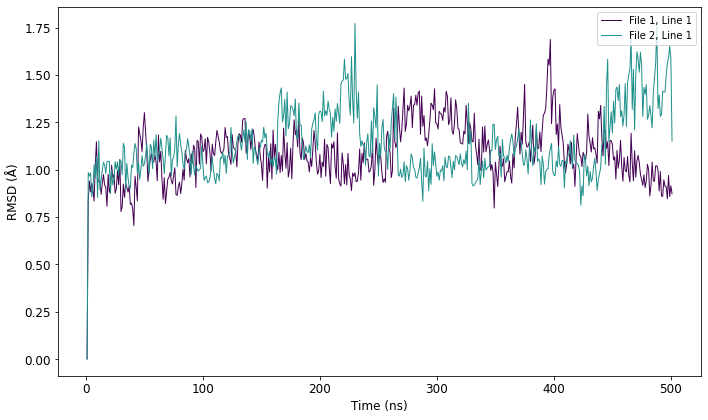

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import glob
from matplotlib.colors import LinearSegmentedColormap

# Specify the pattern for .dat files
file_pattern = '/home/nayanika/github/Thesis/Simulation/cpptraj_scripts/Files/rmsdmouse*.dat'

# Get a list of all .dat files that match the pattern
file_list = glob.glob(file_pattern)

# Set the figure size and font size
fig, ax = plt.subplots(figsize=(8, 6))
plt.rc('font', size=12)  # Set the font size

# Create a gradient colormap
cmap = plt.get_cmap('viridis')

# Normalize colormap to the number of files
norm = plt.Normalize(0, len(file_list))

# Lists to store handles and labels for legend
handles = []
labels = []

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each file with a gradient color
for file_index, file_path in enumerate(file_list, start=1):
    # Load data from the file using numpy
    data = np.loadtxt(file_path)

    # Assuming the first column is x-axis data
    x_values = data[:, 0]

    # Assuming the remaining columns are y-axis data for different lines
    y_values_list = data[:, 1:]

    # Plot each line with a gradient color
    for line_index, y_values in enumerate(y_values_list.T, start=1):
        line_label = f'File {file_index}, Line {line_index}'
        color = cmap(norm(file_index - 1))  # Use normalized index for gradient
        line, = ax.plot(x_values, y_values, label=line_label, color=color, linestyle='-', linewidth=1)
        handles.append(line)
        labels.append(line_label)

# Add labels
ax.set_xlabel('Time (ns)')
ax.set_ylabel('RMSD (Å)')

# Create legend with handles and labels
ax.legend(handles, labels, loc='upper right', fontsize='small')

# Set a tight layout
plt.tight_layout()

# Save the figure as a vector format for better quality (e.g., PDF)
#plt.savefig('publication_quality_plot_gradient.pdf', format='pdf', dpi=300)

plt.show()
